# ARMA(p, q) processes


ARMA models combine two components -- an Autoregressive (AR) component and a Moving Average (MA) comonent

* AR(p) model
* MA(q) model

## Estimating AR(1) model

Given a time series $\{y_t\}_{t=1}^{T}$ consider the problem of estimating the model:

<a id='equation-ar1'></a>
$$
y_t = \alpha y_{t-1} + \varepsilon_t \tag{1}
$$

where $\varepsilon_t$ is a Gaussian white noise with variance $\sigma^2$. The unknown (free) parameter we want to find are $\theta = [\alpha, \sigma^2 ]$.


### Estimation by Maximum likelihood


The joint distribution of $y = [y_1, y_2, ..., y_T]'$ is Multivariate Normal

<a id='equation-Normal'></a>
$$
y \sim \mathcal{N}(0, \Sigma) \tag{2}
$$,

where $\Sigma$ is a Toeplitz matrix  

<a id='equation-Cov-Mat'></a>
$$\begin{equation}
\Sigma = 
\begin{pmatrix}
\gamma(0) & \gamma(1) & \gamma(2) & \cdots & \cdots & \cdots & \cdots & \gamma(T-1)\\
\gamma(1) & \gamma(0) & \gamma(1) & \gamma(2) & & & & \vdots\\
\gamma(2) & \gamma(1) & \gamma(0) & \gamma(1) & \gamma(2) & & & \vdots\\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & & \vdots\\
\vdots & & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots\\
\vdots & & & \gamma(2)& \gamma(1) & \gamma(0) & \gamma(1) & \gamma(2)\\
\vdots & & & & \gamma(2) & \gamma(1) & \gamma(0) & \gamma(1)\\
\gamma(T-1) & \cdots & \cdots  & \cdots & \cdots & \gamma(2) & \gamma(1) & \gamma(0)\\
\end{pmatrix}
\end{equation} \tag{3}$$


The maximum likelihood estimate $\hat{\theta}$ is the value of $\theta$ which maximizes the likelihood function $L(\theta)$, given by

<a id='equation-LF'></a>
$$
L(\theta) = f(y_1, y_2, \cdots, y_T | \theta) =(2\pi)^{-T/2} |\Sigma|^{-1/2} \exp \left(-\frac{1}{2} y' \Sigma^{-1} y \right) \tag{4}
$$

where the dependence on $\theta$ is through $\Sigma$. In practice, $\hat{\theta}$ is obtained by _minimizing_ the negaive log-likelihood function $- \log(L(\theta))$.

### Estimation by OLS

The least square estimate of $\alpha$ is obtained by minimizing

$$ \sum_{t=2}^{T} \left(y_t - \alpha y_{t-1} \right)^2 $$

The solution is the gamiliar OLS estimator (with left-hand side variable $Y = [y_2, y_3, \cdots, y_T]$ and right-hand side variable $X = [y_1, y_2, \cdots, y_{T-1}]$

$$\hat{\alpha} = \frac{X'Y}{X'X}$$

and the estimate of $\hat{\sigma}^2$ is

$$ \hat{\sigma}^2 = \frac{1}{T-1} \sum_{t=2}^{T} \left(y_t - \hat{\alpha} y_{t-1} \right)^2 $$

The OLS estimate of $\theta$ is identical to MLE using _conditional_ likelihood function. First, note that the joint distribution $f(y_1, y_2, \cdots, y_T | \theta)$ can be expressed as product of conditional distributions:

$$ f(y_1, y_2, \cdots, y_T | \theta) = f(y_1 |\theta)f(y_2, y_3, \cdots, y_T |y_1, \theta) \\
    \vdots\\
    =f(y_1 | \theta) \prod_{t=2}^{T} f(y_{t} | y_{1}, \cdots y_{t-1}, \theta) \\
    =f(y_1 | \theta) \prod_{t=2}^{T} f(y_{t} | y_{t-1}, \theta) 
$$

The conditional likelihood function ignores the $f(y_1 | \theta)$ term, and is therefore an approximation of $L(\theta)$, given by

$$\tilde{L}(\theta) =  \prod_{t=2}^{T} f(y_{t} | y_{t-1}, \theta)$$


Since the distribution of $y_{t}$ given $y_{t-1}$ is 

$$\mathcal{N}\left(\alpha y_{t-1}, \sigma^2 \right)$$

we have

$$f(y_{t} |y_{t-1}, \theta) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{1}{2\sigma^2} \left( y_t - \alpha y_{t-1}\right)^2 \right)$$

Therefore 
 $$ \tilde{L}(\theta) = \left(\frac{1}{2\pi\sigma^2}\right)^{\frac{T-1}{2}} \exp \left(-\frac{1}{2\sigma^2} \sum_{t=2}^{T} \left( y_t - \alpha y_{t-1}\right)^2 \right)
 $$
 
The approximate log-likelihood function is 
$$ \log \tilde{L}(\theta) = -\frac{T-1}{2} \log \left(2\pi\sigma^2\right) -\frac{1}{2\sigma^2} \sum_{t=2}^{T} \left( y_t - \alpha y_{t-1} \right)^2 $$

The first order condition with respect to $\sigma^2$ is

$$ \frac{\partial \log \tilde{L}(\theta)}{\partial \sigma^2} = -\frac{T-1}{2\sigma^2} +
\frac{1}{2(\sigma^2)^2} \sum_{t=2}^{T} \left( y_t - \alpha y_{t-1} \right)^2 = 0
$$

which gives 

$$ \hat{\sigma}^2 = \frac{1}{T-1} \sum_{t=2}^{T} \left( y_t - \alpha y_{t-1} \right)^2 $$

The approximate log-likelihood as a function of $\alpha$ alone is
$$ \log \tilde{L}(\alpha) = -\frac{T-1}{2} \log \left( \frac{2\pi}{T-1} \sum_{t=2}^{T} \left( y_t - \alpha y_{t-1} \right)^2 \right) -\frac{T-1}{2} $$

Maximizing $\log \tilde{L}(\alpha)$ is equivalent to minimizing 
$$ \sum_{t=2}^{T} \left(y_t - \alpha y_{t-1} \right)^2 $$
and therefore the approximate MLE of $\alpha$ is the same as the one we get using OLS.

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import arma_generate_sample
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/jlevendi/Time-Series-Econometrics/master/book%20data%20for%20distribution/CSV_data/ARexamples.csv'
df = pd.read_csv(filepath_or_buffer=url, sep='\t', index_col=0)
data = df['X'].values

* statsmodels has a dedicated function for generating a sample from an ARMA pricess

In [3]:
# set the seed for replicability and the number of observations we want to generate
np.random.seed(12345)
n_obs = 500

In [4]:
arparams = np.array([.75]) # AR(1) coefficient
maparams = np.array([0]) # we need to specify the MA part as well
ar1_process = sm.tsa.ArmaProcess.from_coeffs(arparams, maparams)

print(f'The process is stationary? {ar1_process.isstationary}')
print(f'The process is invertible? {ar1_process.isinvertible}')

data = ar1_process.generate_sample(nsample = n_obs, burnin=100)

The process is stationary? True
The process is invertible? True


* This is another way to create the process by specifying the coefficient for autoregressive lag polynomial, including zero lag, and Coefficient for moving-average lag polynomial, including zero lag.

In [5]:
arparams = np.array([.75]) # AR(1) coefficient
maparams = np.array([0])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
ar1_process = sm.tsa.ArmaProcess(ar, ma)

<AxesSubplot:>

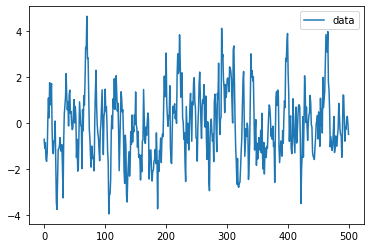

In [6]:
# make a very quick plot of the simulated data
pd.DataFrame(data=data, columns=['data']).plot()

## OLS approach

* create y and X data. Here X is the first order lag of y
* use OLS function of statsmodels

In [7]:
y = df['X'].values[1:]
X = df['X'].values[:-1]

In [8]:
y = data[1:]
X = data[:-1]

In [9]:
OLSmodel = sm.OLS(y, X)
OLSresults = OLSmodel.fit()
print(OLSresults.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.540
Model:                            OLS   Adj. R-squared (uncentered):              0.539
Method:                 Least Squares   F-statistic:                              583.9
Date:                Wed, 05 Jan 2022   Prob (F-statistic):                    6.13e-86
Time:                        18:58:16   Log-Likelihood:                         -701.86
No. Observations:                 499   AIC:                                      1406.
Df Residuals:                     498   BIC:                                      1410.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## AutoReg function of Statsmodels

* AutoReg uses OLS
* trend='n' means that there is no deterministic term in the model, i.e. no constant or time trend

In [10]:
ARmod1 = AutoReg(data, trend='n', lags=1)
ARresults1 = ARmod1.fit()
print(ARresults1.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  500
Model:                     AutoReg(1)   Log Likelihood                -701.864
Method:               Conditional MLE   S.D. of innovations              0.988
Date:                Wed, 05 Jan 2022   AIC                           1407.728
Time:                        18:58:16   BIC                           1416.153
Sample:                             1   HQIC                          1411.034
                                  500                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
y.L1           0.7345      0.030     24.188      0.000       0.675       0.794
                                    Roots                                    
                  Real          Imaginary           M

*  For an AR(p) process to be stable, the roots of the polynomial $\alpha(\cdot)$ must lie outside of the unit circle, this is what the last line in the table above shows. We can also do it ourselves as show below 

In [11]:
alpha = ARresults1.params[0]
poly = np.zeros(2)
poly[0] = -alpha
poly[1] = 1
r = np.roots(poly)
r

array([1.36139333])

## ARIMA function of Statsmodels
    * ARIMA uses MLE
    * ARIMA(p,d,q) with p=1, d=0, q=0 is AR(1)

In [12]:
ARmod2 = ARIMA(data, trend='n', order=(1, 0, 0))
ARresults2 = ARmod2.fit()
print(ARresults2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -703.275
Date:                Wed, 05 Jan 2022   AIC                           1410.549
Time:                        18:58:16   BIC                           1418.978
Sample:                             0   HQIC                          1413.857
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7334      0.031     23.560      0.000       0.672       0.794
sigma2         0.9740      0.057     17.026      0.000       0.862       1.086
Ljung-Box (L1) (Q):                   0.27   Jarque-

In [16]:
ARresults2.arparams
ARresults2.params[1]

0.9740185607137855

### Lets examine the values of the log-likelihood

* statsmodels function output for the log-likelihood at the maximum

In [43]:
ARresults2.llf

-703.2745841216915

here is how we can evaluate the log-likelihood at the estimates of $\alpha$ and $\sigma^2$ 

* compute the theoretical autocovariances for all lags from 0 to T-1 using the `arma_acovf` from statsmodels

In [44]:
from statsmodels.tsa.arima_process import arma_acovf

arparams = ARresults2.arparams
maparams = np.array([0])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
sigma2=ARresults2.params[1]

acov = arma_acovf(ar=ar, ma=ma, nobs=n_obs, sigma2=sigma2)

* create $\Sigma$ matrix using the `toeplitz` function from the scipy library

In [19]:
from scipy.linalg import toeplitz

Sigma = toeplitz(acov)

* compute the log-likelihood function 

In [45]:
T = n_obs
yvec = data.reshape(-1,1) # make into a (T X 1) vector

log_likelihood = -0.5 * (
        T * 1 * np.log(2 * np.pi)
        + np.log(np.linalg.det(Sigma))
        + yvec.T @ np.linalg.inv(Sigma) @ yvec
    ).squeeze() # without squeeze the result is a 2 dimensional array

log_likelihood

-703.2745841216916

* alternatively, use the function from scipy for evaluating the log pdf of multivariate normal

In [47]:
from scipy.stats import multivariate_normal

llf = multivariate_normal.logpdf(data, cov=Sigma)
llf

-703.2745841216916

In [48]:
def logdet_symmetric(matrix):
    lower_triangular = np.linalg.cholesky(matrix)
    return 2 * np.sum(np.log(np.diag(lower_triangular)))